# Machine learning models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.classification_visualization import load_and_plot, plot_data_with_decsion_boundry, plot_sigmoid_function
import plotly_express as px
import ipywidgets as widgets
import pandas as pd
import numpy as np

## What is a model?

* A model is an abstraction, A reduction of a complex problem with complex pattern into a more simplictic view. 
* Models are, in one respect, idealisations in the sense that they are less complicated than reality;

My definition:

* A parametrized assumption that can be:
  * adjusted and fitted to a given dataset using a fitting algorithm (**AKA training**)
  * Used to give prediction on unknown data (**AKA inference**)
  
Most (but not all) models are fitted using a **Loss function** (AKA **cost function**) and a numerical optimization algorithms (Gradient decent, back propogation, Newton method and so on).


## Types of models

Most machine learning models falls into the following two categories:
* **Un-supervised models**:
  * No labling of the data is supplied 
  * The model is not trained against a knwon source of truth (lables)
  * used mainly for clustering (e.g. k-means) or dimensinality reduction (PCA)
* **Supervised models** - 
  * Involves learning a function that maps an input to an output based on example input-output pairs. 
  * Outputs are called lables and the model is trained to bring the labeling error to a mininum. 
  * The main two types of supervised learning:
    * Classification:
        * The lables are classes/categories and the goal is to seperate between the classes, i.e. find a **decision boundry**. 
        * A two class problem is called binary classification problem. 
        * In the case of more than two classes is called **multi-label classification** or **multiclass** problem. 
        * Examples: k-nearset-neighbors, Logistic regression, Decision trees, etc.
     * Regression: 
       * When the lables are continuoes numbers 
       * The goal is to fit a function to the data
       * Examples: Linear regression, polynomial regression, Regression trees etc.
 

### <span style='background :#B6E880' > Further readings: </span>
* Algorithms vs Modles - [what's the difference?](https://machinelearningmastery.com/difference-between-algorithm-and-model-in-machine-learning/)
* Types of [machine learning models](https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a)

## Supervised models - Classification

In classification, the goal is to find a seperating function, AKA **decision boundry**:

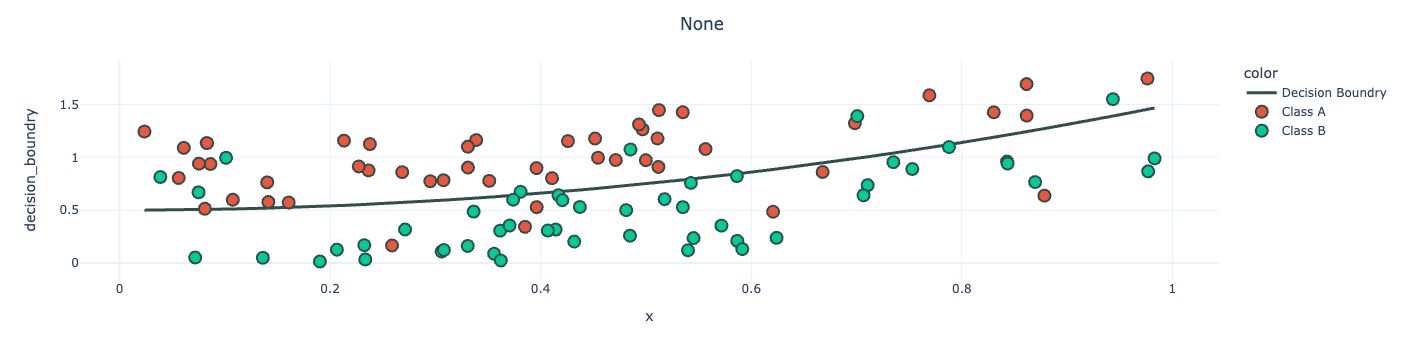

In [46]:
data, fig = load_and_plot('data/classification_problem.csv')
fig.show()

In [48]:
data.shape

(100, 6)

### K-Nearest Neighbors

[K-Nearest Neighbors](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) is a simple yet effective classification/regression algorithm which assumes that similar things exist in close proximity. There's no structural assumption (i.e. decision boundry is linear, quadratic etc.). Altough its effectivness and simplicity, it is rarely used in production since the inference algorithm gets significantly slower as the number of examples and/or predictors/independent variables increases.

**K-Nearest Neighbors summary**:  
* Type: Non-Linear classifier  
* Assumption: A example class should be determined by the majority class of it's closest K neighbors
* Model parameters: K, the number of neighbors
* Loss function: None
* Training algorithm: None
* Training error: 0 in the case of 1NN
* Inference algorithm: Compute the distance to all points in the training set. Reduce to K closest training examples and select the majority class

#### Training example

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
grid = pd.read_csv('data/grid.csv')
grid['True_decision_boundry'] = grid.x.apply(lambda x: x**2 + 0.5) # This is how i've created the data
grid['class_id'] = grid.apply(lambda row: 'A' if row.y > row.True_decision_boundry else 'B', axis=1)

grid.sample(5)

x      y  True_decision_boundry class_id
17789  0.89  0.885                 1.2921        B
34644  0.44  1.730                 0.6936        A
21037  0.37  1.050                 0.6369        A
29843  0.43  1.490                 0.6849        A
28890  0.90  1.440                 1.3100        A

In [6]:
data.head()

x         y  decision_boundry  distance class_id  is_error
0  0.258827  0.166605          0.566991  0.400387        A     False
1  0.361501  0.306716          0.630683  0.323967        B      True
2  0.485307  1.073837          0.735523  0.338314        B     False
3  0.141368  0.577911          0.519985  0.057926        A      True
4  0.496742  1.264874          0.746753  0.518121        A      True

In [7]:
for k in [1,3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['x','y']], data['class_id'])
    grid[f'{k}nn_prediction'] = knn.predict(grid[['x','y']])

In [8]:
grid.head()

x    y  True_decision_boundry class_id 1nn_prediction 3nn_prediction  \
0  0.00  0.0                 0.5000        B              B              B   
1  0.01  0.0                 0.5001        B              B              B   
2  0.02  0.0                 0.5004        B              B              B   
3  0.03  0.0                 0.5009        B              B              B   
4  0.04  0.0                 0.5016        B              B              B   

  5nn_prediction 7nn_prediction 9nn_prediction  
0              B              B              B  
1              B              B              B  
2              B              B              B  
3              B              B              B  
4              B              B              B

In [9]:
@widgets.interact
def show_knn_decesion_boundry(k=widgets.IntSlider(value=1, min=1, max=9, step=2), sample=widgets.FloatSlider(value=0.05, min=0.05, max=1, step=0.25)):
    return plot_data_with_decsion_boundry(grid.sample(frac=sample), decision_boundry_col='True_decision_boundry', class_col= f'{k}nn_prediction', title = f'Decision boundry from {k} nearest neighbor', update_markers=False)

interactive(children=(IntSlider(value=1, description='k', max=9, min=1, step=2), FloatSlider(value=0.05, descr…

<span style='background :yellow' > Exercise - Implement KNN and apply 3NN on the dataset above</span>

<span style='background :yellow' > Exercise - Add certainty score to KNN</span>

In [10]:
class KNN:
    
    def __init__(self, k: int):
        self.k = k
        print(f'Initiated a {k} nearset neighbors classifier')
    
    
    def fit(self, data: pd.DataFrame):
        print('The fit method is not implemented yet!')
        
    
    def predict(self, observations: (float, float)) -> (str, float) :
        print('The predict method is not implemented yet!')
        return None, None

In [11]:
knn_classifier = KNN(2)

Initiated a 2 nearset neighbors classifier


In [12]:
knn_classifier.fit(pd.DataFrame())

The fit method is not implemented yet!


In [13]:
knn_classifier.predict(pd.DataFrame())

The predict method is not implemented yet!


(None, None)

### Logisic Regression

[Logistic regression](https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture) is a linear classifer that is able to produce probablities as well as predicted lables. Instead of predicting exactly 0 or 1, logistic regression generates a probability—a value between 0 and 1, exclusive. For example, consider a logistic regression model for spam detection. If the model infers a value of 0.932 on a particular email message, it implies a 93.2% probability that the email message is spam.

**Logistic regression summary**:  
* Type: Linear classifier  
* Assumption: The decision boundry is a linear line/surface/hyper-plane  
* Model parameters: Weights of the hyper-plane ($\mathbf{w}$, b)
* Loss function: [Log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)
* Training algorithm: [Gradient decent](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent)
* Inference algorithm: Class A if $\frac{1}{1+e^{-z}}$ > 0.5 else class B where $z=\mathbf{w}^\intercal \mathbf{x} + b$


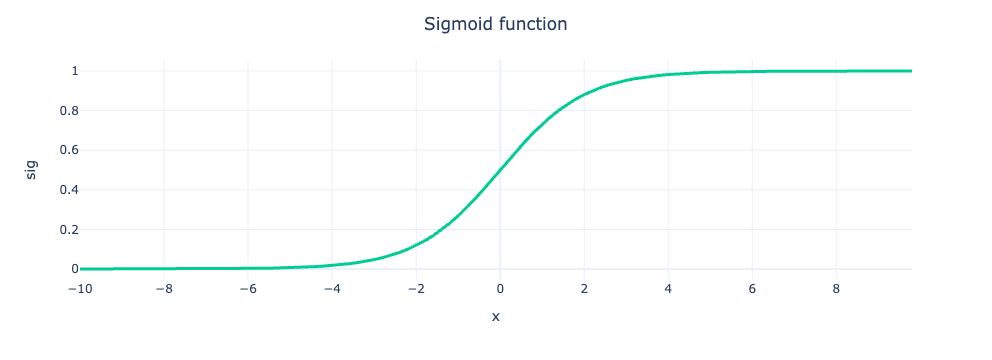

In [14]:
plot_sigmoid_function()

#### Training example

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg = LogisticRegression(penalty='l2', C=2.0)
log_reg.fit(data[['x','y']], data['class_id'])

LogisticRegression(C=2.0)

The decision boundry is the geometrical location in which $\frac{1}{1-e^{-z}}=0.5$, or $z=0$. Since $z= w_1\cdot{x} + w_2\cdot{x_2} + b$, and $z=0$, the decision bounry is locatde at $x_2 = -\frac{w_1\cdot{x_1}}{w_2} -\frac{b}{w_2}$

In [17]:
# Retrieve the model parameters.
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_[0]

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

In [18]:
data['predicted_class'] = log_reg.predict(data[['x','y']])
data[['prob_A','prob_B']] = log_reg.predict_proba(data[['x','y']])
data['log_regression_value'] = data.x.apply(lambda x: m*x + c)

In [19]:
data.head()[['x','y','class_id','predicted_class','prob_A','prob_B']]

x         y class_id predicted_class    prob_A    prob_B
0  0.258827  0.166605        A               B  0.184623  0.815377
1  0.361501  0.306716        B               B  0.218976  0.781024
2  0.485307  1.073837        B               A  0.720281  0.279719
3  0.141368  0.577911        A               A  0.535676  0.464324
4  0.496742  1.264874        A               A  0.824109  0.175891

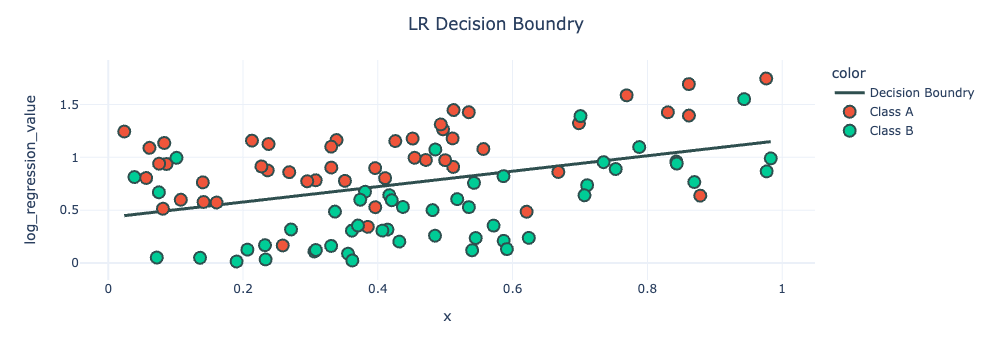

In [20]:
plot_data_with_decsion_boundry(data, 'log_regression_value', title='LR Decision Boundry')

In [21]:
grid['LR_prediction'] = log_reg.predict(grid[['x','y']]) # We will see how LR performs in comparison to other classifiers later on

### Support vector machines

A classification technique that was highly popular and considered state of the Art up until ~2008. Support Vector Machines promise was not only to find a decsion boundry, but more over to find the boundry that maximizes the gap between the two groups. The method was popular also for its built in support for linear, polynomial and RBF kernels, which allowed for linear, non-linear and infinently non linear decision boundries accordingly, by imploying the ["Kernel trick"](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f).

The method lost its place at the toop for the ensamble decision trees (Boosting trees and Random forst) and later, obiously, to DNNs.

**SVM, summary**:  
* Type: Linear, polinomial or super-polynomial classifier, depending on the kernel
* Assumption: The decision boundry is determined by the distance from a close set of support vectors representing the training data
* Model parameters: Weights of each input feature ($\mathbf{w}$)
* Loss function: Explained in depth [here](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d)
* Training algorithm: [Sequential Minimal Optimization](https://en.wikipedia.org/wiki/Sequential_minimal_optimization)
* Inference algorithm: Given an observation, compute and sum its distance from all the support vectors. Positive: class A. Negative: Class B
* Limitations: No support for multi-class classification out of the box


Many possible seperating lines | But only one line seperate the classes with maximal margin
- | -
![alt](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png) | ![alt](https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

[source](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

#### Training example

In [22]:
from sklearn import svm

In [23]:
data.head()

x         y  decision_boundry  distance class_id  is_error  \
0  0.258827  0.166605          0.566991  0.400387        A     False   
1  0.361501  0.306716          0.630683  0.323967        B      True   
2  0.485307  1.073837          0.735523  0.338314        B     False   
3  0.141368  0.577911          0.519985  0.057926        A      True   
4  0.496742  1.264874          0.746753  0.518121        A      True   

  predicted_class    prob_A    prob_B  log_regression_value  
0               B  0.184623  0.815377              0.619954  
1               B  0.218976  0.781024              0.694843  
2               A  0.720281  0.279719              0.785146  
3               A  0.535676  0.464324              0.534281  
4               A  0.824109  0.175891              0.793487

In [24]:
svm_clf = svm.SVC(kernel='poly', degree=2, gamma=2) # kernels availble: 'linear', 'poly', 'rbf'
svm_clf.fit(data[['x','y']], data['class_id'])

SVC(degree=2, gamma=2, kernel='poly')

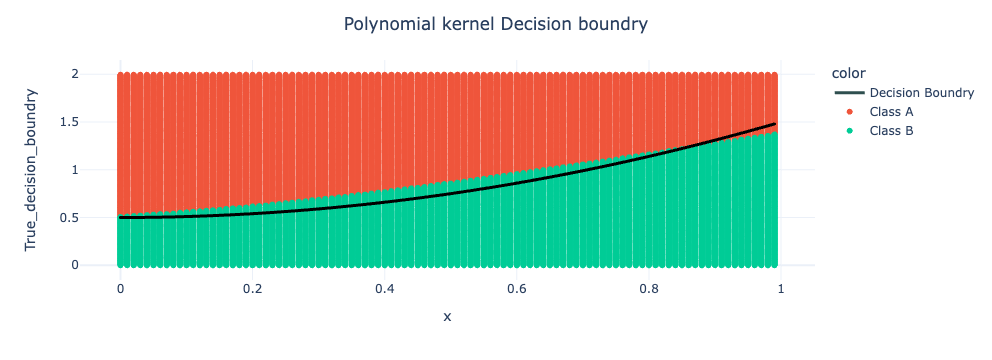

In [25]:
grid['poly_svm_prediction'] = svm_clf.predict(grid[['x','y']])
plot_data_with_decsion_boundry(grid, decision_boundry_col='True_decision_boundry', class_col= f'poly_svm_prediction', 
                               title = f'Polynomial kernel Decision boundry', update_markers=False)

In [26]:
print(svm_clf.support_vectors_[:5])
print(f'\nNumber of support vectors: {len(svm_clf.support_vectors_)}')

[[0.25882687 0.16660465]
 [0.14136849 0.57791066]
 [0.5118161  0.90924137]
 [0.08105027 0.51359166]
 [0.62075161 0.48592877]]

Number of support vectors: 51


<span style='background :yellow'> <b> Exercise + Bonus points! </b> Fill the notebook with decision trees, Random forest and gradient boosting trees short explanation and summaries - Pull request your changes - See links below</span>

## Classification evaluation

Evaluating how good a classifier is performing can be done in many ways and should be carefully fitted to the buisness problem to solve. The classifier performance can be evaluated: 

* Assuming the classifier will handle all incoming observations (Always on mode)
* Assuming the classifier is allowed to output nothing on portion of the data 
* Assuming both classes correct classification is equally important
* Assuming only one class correct classification is of importance

Read more on the basics of classifiers evaluation [here](https://www.svds.com/the-basics-of-classifier-evaluation-part-1/) and [here](https://www.svds.com/classifiers2/).

In binary classification, the classes marked with the label 1 or True is dentod the **positive class**. The class marked with 0,-1 or False is denoted the **negative class**. Predicted classes, as can be expcted of prediction, or either true or false. This give raise to 4 terms capturing all the possible outcomes of a binary classification output:

* True Positive **(TP)** - The observation belonges to the positive class and was predicted as such
* False Positive **(FP)** - The observation belonges to the negative class and was predicted as positive
* True Negative **(TN)** - The observation belonges to the negative class and was predicted as such
* False Negative **(FN)** - The observation belonges to the positive class and was predicted as Negative

### Confusion metrix

![alt](https://miro.medium.com/max/1000/0*FbtRyQH1pU_pOy7b.png) 

[source](https://emilia-orellana44.medium.com/breakdown-confusion-matrix-2cf25842f1ae)

<span style='background :yellow' > Exercise - Write a function that recieves a data frame, true_lable column and predicted_lable column and output the counts and proprotion all combinations of true and predicted lables </span>

The most simplystic evaluation metric, counts the true and false predictions in each class:

In [27]:
def calc_confusion_metrix(data, true_col, pred_col):
    confusion_counts = grid.groupby([true_col,pred_col]).size().to_frame('counts')
    class_counts = grid.groupby([true_col]).size().to_frame('counts')
    confusion_counts['proportion'] = confusion_counts.div(class_counts)
    confusion_counts.index.names = ['True class', 'Predicted class']
    return confusion_counts  

In [28]:
calc_confusion_metrix(grid, true_col='class_id', pred_col='poly_svm_prediction')

counts  proportion
True class Predicted class                    
A          A                 22115    0.945975
           B                  1263    0.054025
B          A                   165    0.009927
           B                 16457    0.990073

In [29]:
calc_confusion_metrix(grid, true_col='class_id', pred_col='7nn_prediction')

counts  proportion
True class Predicted class                    
A          A                 22767    0.973864
           B                   611    0.026136
B          A                  1257    0.075623
           B                 15365    0.924377

<span style='background :yellow' > Exercise: Create an evaluation.py file and the src folder, move the calc_confusion_metrix there</span>

<span style='background :yellow' > Create a dataframe with summary of all the classifiers in the grid columns. Present them as a multi-column dataframe as can be seen below:</span>

Let's modifiy the calc_confusion_metrix a bit:

In [30]:
def calc_confusion_metrix(data, true_col, pred_col, clf_name = None):
    confusion_df = data.groupby([true_col,pred_col]).size().to_frame('counts')
    confusion_df['proportion'] = confusion_df.div(confusion_df.groupby(true_col).sum())
    confusion_df.index.names = ['True class', 'Predicted class']
    if clf_name:
        confusion_df['Name'] = clf_name
        return confusion_df.set_index('Name', append=True)    
    return confusion_df 

In [31]:
clfs = [c for c in grid.columns if 'pred' in c]
all_results = pd.concat([calc_confusion_metrix(grid, 'class_id', clf_col, clf_col) for clf_col in clfs])
all_results.unstack('Name').proportion

Name                        1nn_prediction  3nn_prediction  5nn_prediction  \
True class Predicted class                                                   
A          A                      0.880229        0.953418        0.970314   
           B                      0.119771        0.046582        0.029686   
B          A                      0.240103        0.122428        0.083444   
           B                      0.759897        0.877572        0.916556   

Name                        7nn_prediction  9nn_prediction  LR_prediction  \
True class Predicted class                                                  
A          A                      0.973864        0.974720       0.981564   
           B                      0.026136        0.025280       0.018436   
B          A                      0.075623        0.058717       0.069727   
           B                      0.924377        0.941283       0.930273   

Name                        poly_svm_prediction  
True class Predicted class                       
A          A                           0.945975  
           B                           0.054025  
B          A                           0.009927  
           B                           0.990073

<span style='background :yellow' > Question - Which classifier would you choose, based on the above results?</span>

### Accuracy

**Definition:**

$$\large \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

Or in **TP, FP, TN, FN** terms:

<span style='background :yellow' > Try to write the formula for accuracy in TP, FP, TN, FN yourself</span>

$$\large \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}} $$

Accuracy is a measure that takes into account the sucessul predictions **of both classes**. Thus, it shoud be reported only if the classification success of both classes is **equally important**. Special care should be taken in using this metric if the classes are unbalanced - This is a common question in job interviews. To see why reporting accuracy in an imbalanced classsification problem is problematic, consider the following scenario:
* A training set in which the negative class is 99% of the training set
* A classifier that output only negative classes, no matter what. 

The classifier above, learned nothing, will produce a 99% classification accuracy! 

### Accuracy - Detection curve 

Classifiers that output probabilties or certanity scores are allowing us to evaluate and use them only when their certainty score is high enough for our buisness needs. Selecting a threshold from which the classifier ouptut is to be used is called **Setting a workpoint**.  For example, consider the common buisness case in which we need to decided whether a child-magician should be placed in gryffindor or ravenclaw houses. To avoid future issues, we might want to refer a child only if his fit probability is higher then a minimum probability/certainty. 

An accuracy decetion curve represent all the possible trade-offs between the accuracy of the model and the proportion of events detected. Setting a high threshold will ensure that we will be very accurate in assigning children, but also that a large proportion of children will not be assigned at all. Lowering the threshold will allow more children (events) to be assigned, but will leave us combanting the consequences of lower fit accuracy later on. 

<span style='background :yellow' > The dataframe below contains the historcal gryffindor and ravenclaw assigments, and the correct assignemts after mistakes were fixed and children were moved at later time. Can you think of an algorithm to calculate different accuracy-detection trade-offs? Implement such algorithem</span>

In [32]:
magicians_assigments = pd.read_csv('data/magicians_classification.csv')
magicians_assigments.head()

Name true_assigment  \
0  Mary Voldemort (Tom Marvolo Riddle)– The villa...     gryffindor   
1                                     Angelina Ogden      ravenclaw   
2                                      Antioch Vance     gryffindor   
3                                    Antioch Weasley     gryffindor   
4                                 Buckbeak Pettigrew     gryffindor   

  predicted_assigmnet  certainty_score  
0           ravenclaw         0.075615  
1           ravenclaw         0.913575  
2          gryffindor         0.839816  
3           ravenclaw         0.328022  
4          gryffindor         0.720268

In [33]:
thds = [i/10 for i in range(1,10)]
thds

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [34]:
trade_offs = []
for thd in thds:
    data = magicians_assigments.query('certainty_score >= @thd')
    print(f'Thd is: {thd}. Exceeded the threshold: {len(data)}. Detection rate: {len(data) / len(magicians_assigments)}')
    trues = data[data.true_assigment == data.predicted_assigmnet]
    falses = data[data.true_assigment != data.predicted_assigmnet]
    tp, fp = trues.query('true_assigment == "gryffindor"').shape[0], falses.query('true_assigment == "gryffindor"').shape[0]
    tn, fn = trues.query('true_assigment == "ravenclaw"').shape[0], falses.query('true_assigment == "ravenclaw"').shape[0]
    assert (tp+fp+tn+fn) == len(data)
    
    accurary, detection = (tp + tn) / len(data), len(data) / len(magicians_assigments)
    trade_offs.append((thd, accurary, detection))   

Thd is: 0.1. Exceeded the threshold: 921. Detection rate: 0.921
Thd is: 0.2. Exceeded the threshold: 829. Detection rate: 0.829
Thd is: 0.3. Exceeded the threshold: 714. Detection rate: 0.714
Thd is: 0.4. Exceeded the threshold: 610. Detection rate: 0.61
Thd is: 0.5. Exceeded the threshold: 513. Detection rate: 0.513
Thd is: 0.6. Exceeded the threshold: 405. Detection rate: 0.405
Thd is: 0.7. Exceeded the threshold: 310. Detection rate: 0.31
Thd is: 0.8. Exceeded the threshold: 225. Detection rate: 0.225
Thd is: 0.9. Exceeded the threshold: 110. Detection rate: 0.11


In [35]:
trade_offs

[(0.1, 0.6069489685124865, 0.921),
 (0.2, 0.6550060313630881, 0.829),
 (0.3, 0.7226890756302521, 0.714),
 (0.4, 0.7819672131147541, 0.61),
 (0.5, 0.834307992202729, 0.513),
 (0.6, 0.891358024691358, 0.405),
 (0.7, 0.9419354838709677, 0.31),
 (0.8, 0.9866666666666667, 0.225),
 (0.9, 1.0, 0.11)]

In [36]:
pd.DataFrame(trade_offs, columns=['thd','accuracy','detection'])

thd  accuracy  detection
0  0.1  0.606949      0.921
1  0.2  0.655006      0.829
2  0.3  0.722689      0.714
3  0.4  0.781967      0.610
4  0.5  0.834308      0.513
5  0.6  0.891358      0.405
6  0.7  0.941935      0.310
7  0.8  0.986667      0.225
8  0.9  1.000000      0.110

### Precision recall curve

**Precision, and precision-recall curves, should be used when we only care about the detection (identification) performance of one class (denoted the positive class).**

consider a buisness case in which we need to decide whether to decline or accepet a financial transtaction. The action is binary, so we've trained a classifier to decide it for us. We can also decided that we will decline a transaction only when the classifier is extremly condifdent (indicated by it's probabilty/certainty score) that the transaction is fraudulent. 

We might be tempeted to use accuracy or accuracy-detection curve to describe/evaluate our classifier prediction, but, since we only care about the rare event of fraudulent act (say 1:1000 transactions), accuracy will mislead us and will not measure how good are we in identifying fraudulent transactions per-se. To focus on measuring the performance of identfifing one class only, we need to compute precision:

$$\Large Precision = \frac{TP}{TP+FP}$$

Or in words - How many of the **postivly predicted** events are **indeed positive**. 

If our classifier outputs probability/certainty scores, we can decide that we are willing to label a new observation as postive only above a certain score. Thus we can increase the precision at the price of recall:

$$\large Recall = \frac{TP}{\text{Overall TP in the dataset}}$$

Consider the following illustartion:

![alt](https://developers.google.com/machine-learning/crash-course/images/PrecisionVsRecallLowerThreshold.svg) 

There are 9 spam (green dots) and 3 non spam (red dots) events over the threshold, thus the precision (of detecting spam) is $\frac{9}{12}=0.75%$ while we identifed only 9 of overall 11 spam events, thus our recall is $\frac{9}{11}=0.82$

read and see more illustration [here](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall).

<span style='background :yellow' > Exercise - Load the unbalanced dataset in the data folder. Do the following: </span>

<span style='background :yellow' > 1. calculate how unbalanced the dataset is.  </span>

<span style='background :yellow' > 2. If the dimension allows it, scatter plot the data  </span>

<span style='background :yellow' > 3. Train a LR and KNN (k of your choice) on it  </span>

<span style='background :yellow' > 4. For each model, decided on a proper metric and compute it. If possible, compute a proper curve of pontential working points  </span>



**Hints:**

1. Use value_counts() of proper column. also use the normalize=True argument to get proportions
2. run px.scatter? and read the usage docs
4. Use precision for KNN, and precision-recall curve for LR potential working points.

In [37]:
unbalanced_ds = pd.read_csv('data/unbalanced_dataset.csv')

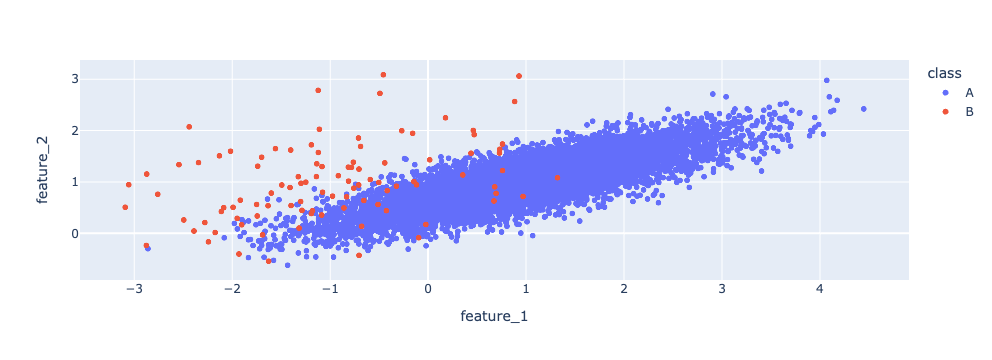

In [38]:
px.scatter(unbalanced_ds, x='feature_1', y='feature_2', color='class')

## Gradient decent

### Defining a loss function

Many machine learning models (Linear regression, logistic regression, neural networks to name a few) are based on defining a loss function which is a function of the model paramenters and minimizing it using a numeric, iterative algorithm. One very popular such algorithm is called gradient decent. If the defined loss function is convex, we are guarnteed to reach the global minimum and thus find **The set of model parameters that optimally fits the data**.

Consider the linear regression loss function:

$$\large{Loss = \frac{1}{n}\sum_{i}^{n}{(y_i - \bar{y_i})^2}}$$

Or: 
    
$$\large{Loss = \frac{1}{n}\sum_{i}^{n}{(y_i - {w}^{T}x_i)}}$$

Or for a 2D input, even:

Or: 
    
$$\large{Loss = \frac{1}{n}\sum_{i}^{n}{(y_i - mx_i+c)^2}}$$

So we square the error and find the mean. hence the name Mean Squared Error. This function is a quadratic function of $w_i$, the model weights, and thus a convex function.

### Optimizing the loss with gradient decent

A convex loss function is bowl-shaped, and have one minima, which is the global minima. On the contrary, non-convex loss function have multiple minimas, some much "higher" than the global minima. See the following illustration: 


![alt](https://i.pinimg.com/originals/89/f9/bd/89f9bddacf547661dfc209d4b31c2c12.png) 

In gradient decent, we compute the function gradient (slope) value at a the start point, and apdate the model paramenrs by substracting a portion (we call that portion the learinng rate, 0.1 is very common) of the gradient value. by substracting that minor part, we are decending on the loss function at the direction of the gradient, hence the name **Gradient decent**. The apdated weights will have a smaller loss, and we can repeat the process, denecnding on the loss function with each iteration, until reaching a minima. If the loss function is convex **and the learning rate is set small enough** we are guarnteed to reach a minima, and that the minima we've reached is the global minima, which means we've reached the optimal set of model paramenrs. 

The process can be imagined as walking down a mountain, blind folded, at the fastest rate possible. Which direction will we go? We will use our foot to estimate the slop in each possible direction, and choose the directing with the maximal neative slope (the gradient). Than we will take a small step in that direction (we are blind folded, remember? be carefull!) - we will repeat that until we will safely reach the bottom. 

The algorithm:
* Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
* Square this difference.
* Find the mean of the squares for every value in X.
* Calculate the gradient, i.e. the partial derivatives of the loss function with respect to the model paramerters ($w_i$) and plug in the current values to obtain the derivative value $d_i$.
* Update the current value of m and c using the following equations:
  * $w_{i+1} = w_{i} - {lr}*{d_i}$ 
  * Where $lr$ is the learning rate.
* Repeat this process until our loss function is a very small value or ideally 0

### Example: Linear regression

The partial derivatives with respect to m and c ($d_m$, $d_c$) are:

$\large{D_m} = \frac{-2}{n}\sum_{i=0}^{n} x_i(y_i - \bar{y_i})$

$\large{D_c} = \frac{-2}{n}\sum_{i=0}^{n} (y_i - \bar{y_i})$



Let's first create a noisy data around the line $y=2x + 2$:

In [39]:
m, c = 2, 2
xs = [1,2,3]
ys = [m*x + c for x in xs]
noisy_ys = [y + np.random.normal(loc=0, scale=0.5) for y in ys]

In [40]:
regression_data = pd.DataFrame({'x': xs, 'y': ys, 'noisy_y': noisy_ys})
regression_data

x  y   noisy_y
0  1  4  4.375066
1  2  6  5.283301
2  3  8  8.290914

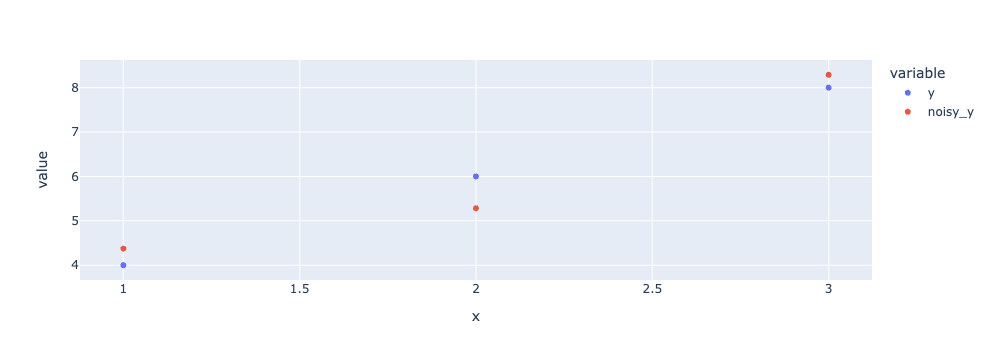

In [41]:
px.scatter(regression_data, x='x',y=['y','noisy_y'])

We have seen the loss function for the linear regression problem, let's start optimizing. First, let's define the loss function to calculate the loss:

In [42]:
from sklearn.metrics import mean_squared_error
def perform_gradient_decent(X, Y, iterations=20):
    m = 0
    c = 0
    L = 0.001  # The learning Rate
    n = float(len(X)) # Number of elements in X

    # Performing Gradient Descent:
    for i in range(iterations): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        loss = mean_squared_error(Y, Y_pred)
    return m, c

**Note: The actual loss value is not really needed, but can be used to verify that indeed the loss is decreasing with each iteration**

In [43]:
perform_gradient_decent(regression_data.x, regression_data.y, iterations=10000)

(2.037297775049083, 1.9152133904835302)

The following visualization shows graphically what happens with each iteration of the gradient decent algorithm:

![alt](https://miro.medium.com/max/1400/1*CjTBNFUEI_IokEOXJ00zKw.gif)

### Logistic Regression Loss function

$$\text{Log Loss} = \sum_{(x,y)\in D} -y\log(\bar{y}) - (1 - y)\log(1 - \bar{y})$$


<p>where:</p>

<ul>
  <li>
  \((x,y)\in D\) is the data set containing many labeled
  examples, which are \((x,y)\) pairs.
  </li>
  <li>
    \(y\) is the label in a labeled example.  Since this is logistic regression,
    every value of \(y\) must either be 0 or 1.
  </li>
  <li>
    \(\bar{y}\) is the predicted value \(\frac{1}{1+e^{-w^Tx}}\) which is somewhere between 0 and 1, given the set
    of features in \(x\).
  </li>
</ul>

<span style='background :yellow' > Exercise : What are the partial derivatives of the model? Implement gradient decent for the logistic regression case</span>

## <span style='background :#B6E880' > Further readings: </span>

For all sklearn classifiers: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

* SVMs and the [kernel trick](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f): 
* Decision trees:
  * A Complete (and friendly) [guide](https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14) 
  * [More in depth](https://www.ise.bgu.ac.il/faculty/liorr/hbchap9.pdf)
* Boosting trees (Decision trees with ensamble learning):
  * A complete and friednly [guide](https://towardsdatascience.com/gradient-boosted-decision-trees-explained-with-a-real-life-example-and-some-python-code-77cee4ccf5e) for boosting, bagging, ensamle learning and best classifers employing these techniques: Random forest and gradient boosting trees


In [44]:
!jupyter nbconvert --to html Classification\ models.ipynb

[NbConvertApp] Converting notebook Classification models.ipynb to html
[NbConvertApp] Writing 5715827 bytes to Classification models.html
